In [32]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D, Flatten, GlobalAveragePooling2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from keras.callbacks import EarlyStopping

In [2]:
base_dir = '/kaggle/input/datasetml/Coba DS'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'val')

In [3]:
os.listdir(train_dir)

['DS', 'Normal']

In [4]:
os.listdir(test_dir)

['DS', 'Normal']

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode='nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [26]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 2399 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [33]:
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    # Fourth Convolutional Block
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    # Global Average Pooling instead of Flatten
    GlobalAveragePooling2D(),
    
    # Fully Connected Layers
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    
    Dense(1, activation='sigmoid')  # Binary Classification (sigmoid activation)
])

In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 456,385 (1.74 MB)

 Trainable params: 455,425 (1.74 MB)

 Non-trainable params: 960 (3.75 KB)

In [35]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [36]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.6326 - loss: 0.6933

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 382ms/step - accuracy: 0.6327 - loss: 0.6930 - val_accuracy: 0.6183 - val_loss: 0.6725
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 339ms/step - accuracy: 0.6808 - loss: 0.5983 - val_accuracy: 0.5067 - val_loss: 0.7600
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 330ms/step - accuracy: 0.6635 - loss: 0.6155 - val_accuracy: 0.5000 - val_loss: 0.8516
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 336ms/step - accuracy: 0.6853 - loss: 0.6099 - val_accuracy: 0.5550 - val_loss: 0.7630
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 336ms/step - accuracy: 0.6903 - loss: 0.5885 - val_accuracy: 0.5733 - val_loss: 0.6688
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 340ms/step - accuracy: 0.6998 - loss: 0.5953 - val_accuracy: 0.6517 - val_loss: 0.6171
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 337ms/step - accuracy: 0.6958 - loss: 0.5905 - val_accuracy: 0.6383 - val_loss: 0.6513
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 331ms/step - accuracy: 0.7217 - loss: 0.5624 - val_accuracy: 0.690

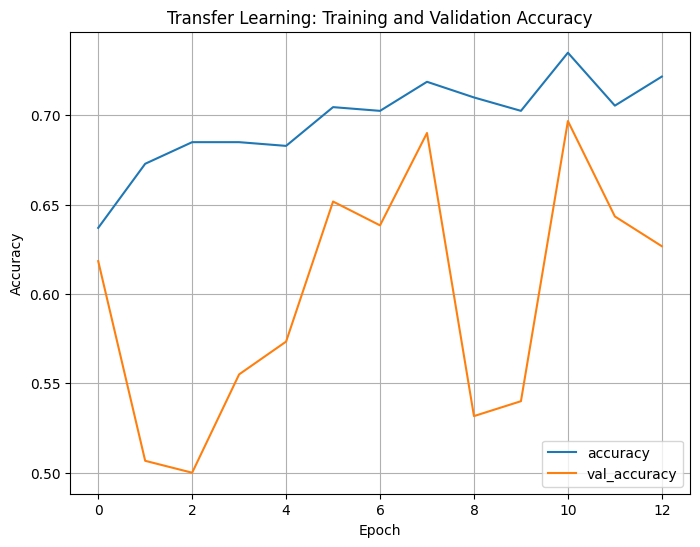

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Transfer Learning: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [39]:
input_shape = (224, 224, 3)

base_model = tf.keras.applications.MobileNetV2(
    weights='/kaggle/input/mobilnet/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top (1).h5',
    include_top=False,
    input_shape=input_shape
)

base_model.trainable = False

In [40]:
x = base_model.output
x = GlobalAveragePooling2D()(x)               # Global average pooling to reduce dimensions
x = Dense(512, activation='relu')(x)          # Fully connected layer with 512 neurons
x = Dropout(0.5)(x)                            # Dropout for regularization
predictions = Dense(1, activation='sigmoid')(x) 

In [52]:
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# 5. Compile the model with a lower learning rate for the pre-trained layers
model_transfer.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(learning_rate=1e-5),
    metrics=['accuracy']
)

In [53]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)
history_transfer = model_transfer.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks = [early_stopping]
)

Epoch 1/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 45s 431ms/step - accuracy: 0.8527 - loss: 0.3368 - val_accuracy: 0.8783 - val_loss: 0.6293
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 334ms/step - accuracy: 0.8640 - loss: 0.3168 - val_accuracy: 0.8767 - val_loss: 0.6010
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 337ms/step - accuracy: 0.8586 - loss: 0.3298 - val_accuracy: 0.8783 - val_loss: 0.5711
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 356ms/step - accuracy: 0.8637 - loss: 0.3018 - val_accuracy: 0.8817 - val_loss: 0.5463
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 367ms/step - accuracy: 0.8775 - loss: 0.3025 - val_accuracy: 0.8833 - val_loss: 0.5155
Epoch 6/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 336ms/step - accuracy: 0.8843 - loss: 0.2873 - val_accuracy: 0.8867 - val_loss: 0.4863
Epoch 7/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 334ms/step - accuracy: 0.8803 - loss: 0.2863 - val_accuracy: 0.8867 - val_loss: 0.4567
Epoch 8/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 334ms/step - accuracy: 0.8750 - loss: 0.2847 - val_accu

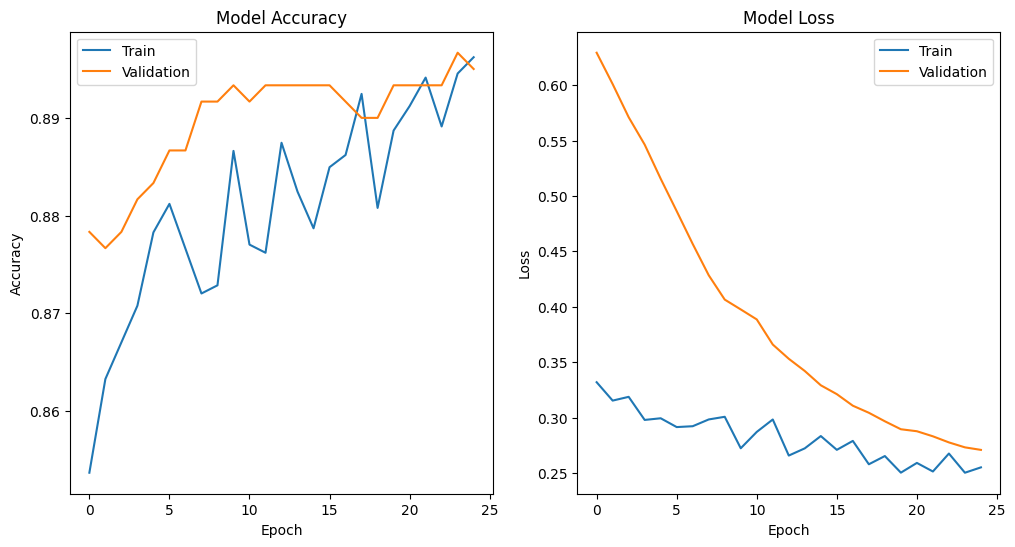

In [58]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['accuracy'])
plt.plot(history_transfer.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['loss'])
plt.plot(history_transfer.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

In [59]:
model.save("ModelCNN2.h5")

In [60]:
# 8. Fine-Tuning: Unfreeze some layers of the base model for further training

# Unfreeze the base model
base_model.trainable = True

# It's often recommended to unfreeze from a certain layer onwards
# Let's unfreeze the last 20 layers
for layer in base_model.layers[:-20]:
    layer.trainable = False

In [61]:
# Re-compile the model with a lower learning rate
model_transfer.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(learning_rate=1e-5),
    metrics=['accuracy']
)

In [64]:
# Continue training (fine-tuning)
history_fine = model_transfer.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator
)

Epoch 1/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 338ms/step - accuracy: 0.8972 - loss: 0.2478 - val_accuracy: 0.9083 - val_loss: 0.2578
Epoch 2/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 332ms/step - accuracy: 0.8958 - loss: 0.2393 - val_accuracy: 0.9000 - val_loss: 0.2607
Epoch 3/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 334ms/step - accuracy: 0.8989 - loss: 0.2445 - val_accuracy: 0.8983 - val_loss: 0.2589


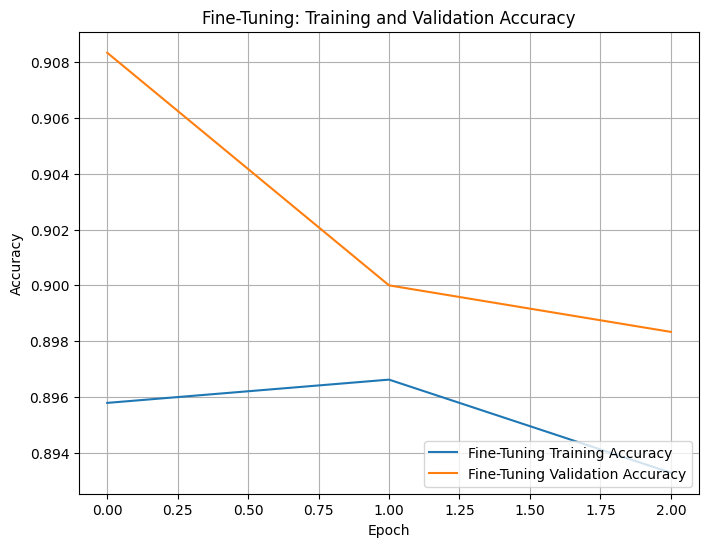

In [65]:
# Plot Fine-Tuning Results
plt.figure(figsize=(8, 6))
plt.plot(history_fine.history['accuracy'], label='Fine-Tuning Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Fine-Tuning Validation Accuracy')
plt.title('Fine-Tuning: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [66]:
model.save("FineTune.h5")